## CS 529: Security Analytics - Homework 2 (FALL'19)
### Problem 3

#### Name:Haoyang Wei
#### Purdue id: wei302


In this problem will use the Pima Indians Diabetes dataset from the UCI repository to experiment with the $k$-NN algorithm and find the optimal value for the number of neighbors  $k$. You do not need to implement the algorithm and encouraged to use the implementation in \texttt{scikit-learn}.


### a) 
Download the provided `Pima.csv` data file and load it using `pandas`. As a sanity check, make sure  there are 768 rows of data (potential diabetes patients) and 9 columns (8 input features including  `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`, and 1 target output). Note that the data file has no header and you might want to explicitly create the header. The last value in each row contains the target label for that row, and the remaining values are the features. Report the statics of each feature (min, max, average) and the histogram of the labels (target outputs).
    

Minimum value of  Pregnancies  is  0
Maximum value of  Pregnancies  is  17
Average value of  Pregnancies  is  3.8450520833333335
Standard deviation value of  Pregnancies  is  3.36957806269887


Minimum value of  Glucose  is  0
Maximum value of  Glucose  is  199
Average value of  Glucose  is  120.89453125
Standard deviation value of  Glucose  is  31.97261819513622


Minimum value of  BloodPressure  is  0
Maximum value of  BloodPressure  is  122
Average value of  BloodPressure  is  69.10546875
Standard deviation value of  BloodPressure  is  19.355807170644777


Minimum value of  SkinThickness  is  0
Maximum value of  SkinThickness  is  99
Average value of  SkinThickness  is  20.536458333333332
Standard deviation value of  SkinThickness  is  15.952217567727637


Minimum value of  Insulin  is  0
Maximum value of  Insulin  is  846
Average value of  Insulin  is  79.79947916666667
Standard deviation value of  Insulin  is  115.24400235133817


Minimum value of  BMI  is  0.0
Maximum value of  B

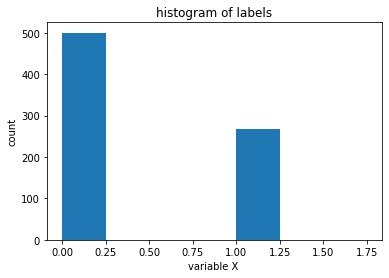

In [20]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import math
from statistics import mean, stdev 
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max.columns', 1000)
pd.set_option('display.max.rows', 1000)
df = pd.read_csv('Pima.csv',names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age","Target output"])
names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age","Target output"]
for i in range(len(names)-1):
    print("Minimum value of ", names[i]," is ", min(df[names[i]]))
    print("Maximum value of ", names[i]," is ", max(df[names[i]]))
    print("Average value of ", names[i]," is ", mean(df[names[i]]))
    print("Standard deviation value of ", names[i]," is ", stdev(df[names[i]]))
    print("\n")
features = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
output = df["Target output"]
bins = np.arange(0, 2, 0.25)
plt.title('histogram of labels')
plt.xlabel('variable X ')
plt.ylabel('count')
plt.hist(output, bins, histtype='bar', rwidth=1)
plt.show()


### b) 
Split the data into training and test data with 80\% training and 20\% test data sizes. 

Use 5-fold cross-validation on training data to decide the best number of neighbours $k$. To this end, you can use the built in functionality in  `scikit-learn` such as `cross_val_score`. For $k=1,2,3,\ldots, 15$ compute the 5-fold cross validation error and plot the results  (with values of $k$ on the $x$-axis and accuracy on the $y$-axis). Include the plot in your report and justify your decision for picking a particular number of neighbors $k$.

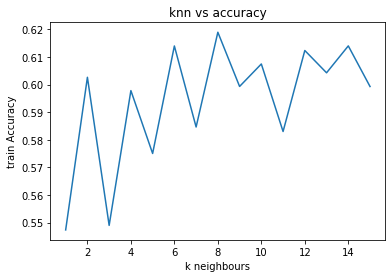

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test = train_test_split(features,test_size = 0.2)
Y_train,Y_test = train_test_split(output,test_size = 0.2)
mean_score = []
for i in range(15):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
    mean_score.append(mean(scores))
k_neighbours = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.plot(k_neighbours, mean_score)
plt.title('knn vs accuracy')
plt.xlabel('k neighbours')
plt.ylabel('train Accuracy')
plt.show()

### c ) 
Evaluate the $k$-NN algorithm on test data with the optimal number of neighbours you obtained in previous step and report the test error.

In [22]:
knn = KNeighborsClassifier(n_neighbors=12)
scores = cross_val_score(knn, X_test, Y_test, cv=5, scoring='accuracy')
test_mean = mean(scores)


### d) 
Process the input data  by subtracting the mean (a.k.a. centralization) and dividing by the standard deviation (a.k.a. standardization) over each dimension (feature),  repeat the previous part and report the accuracy. Do centralization and standardization affect the accuracy? Why?

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
temp = scaler.transform(X_train)
scaler.fit(X_test)
temp_test = scaler.transform(X_test)

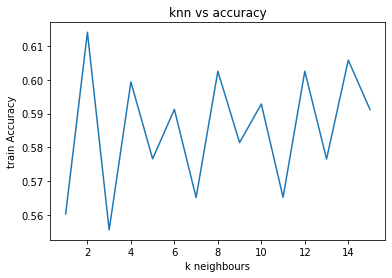

In [24]:

mean_score = []
for i in range(15):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    scores = cross_val_score(knn, temp, Y_train, cv=5, scoring='accuracy')
    mean_score.append(mean(scores))
k_neighbours = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.plot(k_neighbours, mean_score)
plt.title('knn vs accuracy')
plt.xlabel('k neighbours')
plt.ylabel('train Accuracy')
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=12)
scores = cross_val_score(knn, temp_test, Y_test, cv=5, scoring='accuracy')
test_mean = mean(scores)


0.6948387096774193